In [28]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline
from sklearn.model_selection import train_test_split

In [29]:
# reading the data set
df = pd.read_csv('bmresults.csv', low_memory=False)
# https://github.com/llimllib/bostonmarathon

In [30]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [31]:
df.shape

(31984, 21)

In [32]:
list(df)

['10k',
 'name',
 'division',
 '25k',
 'gender',
 'age',
 'official',
 'bib',
 'genderdiv',
 'ctz',
 '35k',
 'overall',
 'pace',
 'state',
 '30k',
 '5k',
 'half',
 '20k',
 'country',
 'city',
 '40k']

In [33]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [34]:
df = df.drop('ctz', 1)
df = df.drop('state', 1)
df= df.drop('name', 1)
df= df.drop('bib', 1)
df= df.drop('genderdiv', 1)
df= df.drop('country', 1)
df= df.drop('city', 1)

In [35]:
df = pd.concat([df, pd.get_dummies(df['gender'], drop_first=True)], axis=1)

In [36]:
df = df.drop('gender', 1)

In [37]:
df.head()

,10k,division,25k,age,official,35k,overall,pace,30k,5k,half,20k,40k,M
0,17.37,8,47.67,47,85.25,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43,1
1,32.58,1,82.43,33,138.95,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,0
2,16.62,1,45.80,41,80.60,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10,1
3,32.57,3,82.43,24,140.58,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,0
4,17.12,2,46.37,40,81.23,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72,1


In [38]:
df = df.replace(to_replace='-', value=0)
df2 = df.copy()

In [39]:
df2.head()

,10k,division,25k,age,official,35k,overall,pace,30k,5k,half,20k,40k,M
0,17.37,8,47.67,47,85.25,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43,1
1,32.58,1,82.43,33,138.95,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,0
2,16.62,1,45.80,41,80.60,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10,1
3,32.57,3,82.43,24,140.58,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,0
4,17.12,2,46.37,40,81.23,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72,1


## K-Mean

In [40]:
#Divide into training and test sets.
X_train, X_test = train_test_split(
    df,
    test_size=0.2,
    random_state=42)

In [41]:
X_test.head()

,10k,division,25k,age,official,35k,overall,pace,30k,5k,half,20k,40k,M
22459,47.42,1389,121.83,40,210.67,172.97,9535,8.05,147.22,23.53,102.65,97.27,199.63,1
29581,62.85,5420,163.80,37,314.82,250.13,28470,12.02,203.33,30.93,136.12,129.17,295.07,1
16599,44.32,41,113.67,52,205.48,164.93,7938,7.85,138.75,21.72,95.52,90.52,192.97,0
11604,47.75,522,123.07,40,218.05,177.62,11808,8.32,149.83,23.50,103.13,97.73,205.55,0
6188,51.22,1565,137.02,50,235.70,195.60,16905,9.00,166.03,24.92,114.13,107.90,223.75,1


In [42]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit(df)

df['cluster'] = y_pred.labels_
df.head()

,10k,division,25k,age,official,35k,overall,pace,30k,5k,half,20k,40k,M,cluster
0,17.37,8,47.67,47,85.25,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43,1,0
1,32.58,1,82.43,33,138.95,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,0,0
2,16.62,1,45.80,41,80.60,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10,1,0
3,32.57,3,82.43,24,140.58,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,0,0
4,17.12,2,46.37,40,81.23,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72,1,0


In [43]:
df.cluster.value_counts()

0    8077
2    8042
1    7990
3    7875
Name: cluster, dtype: int64

In [44]:
df.dtypes

10k          object
division      int64
25k          object
age           int64
official    float64
35k          object
overall       int64
pace        float64
30k          object
5k           object
half         object
20k          object
40k          object
M             int64
cluster       int32
dtype: object

In [45]:
for i in range(0, 31984):
    if df.iloc[i, 14] == 0:
        df['newcluster'] = 'zero'
    elif df.iloc[i, 14] == 1:
        df['newcluster'] = 'one'
    elif df.iloc[i, 14] == 2:
        df['newcluster'] = 'two'
    elif df.iloc[i, 14] == 3:
        df['newcluster'] = 'three'
    else:
        df['newcluster'] = 'four'
        

In [46]:
df.head()

,10k,division,25k,age,official,35k,overall,pace,30k,5k,half,20k,40k,M,cluster,newcluster
0,17.37,8,47.67,47,85.25,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43,1,0,two
1,32.58,1,82.43,33,138.95,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,0,0,two
2,16.62,1,45.80,41,80.60,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10,1,0,two
3,32.57,3,82.43,24,140.58,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,0,0,two
4,17.12,2,46.37,40,81.23,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72,1,0,two


In [47]:
df.newcluster.value_counts()

two    31984
Name: newcluster, dtype: int64

ValueError: color kwarg must have one color per data set. 31984 data sets and 1 colors were provided

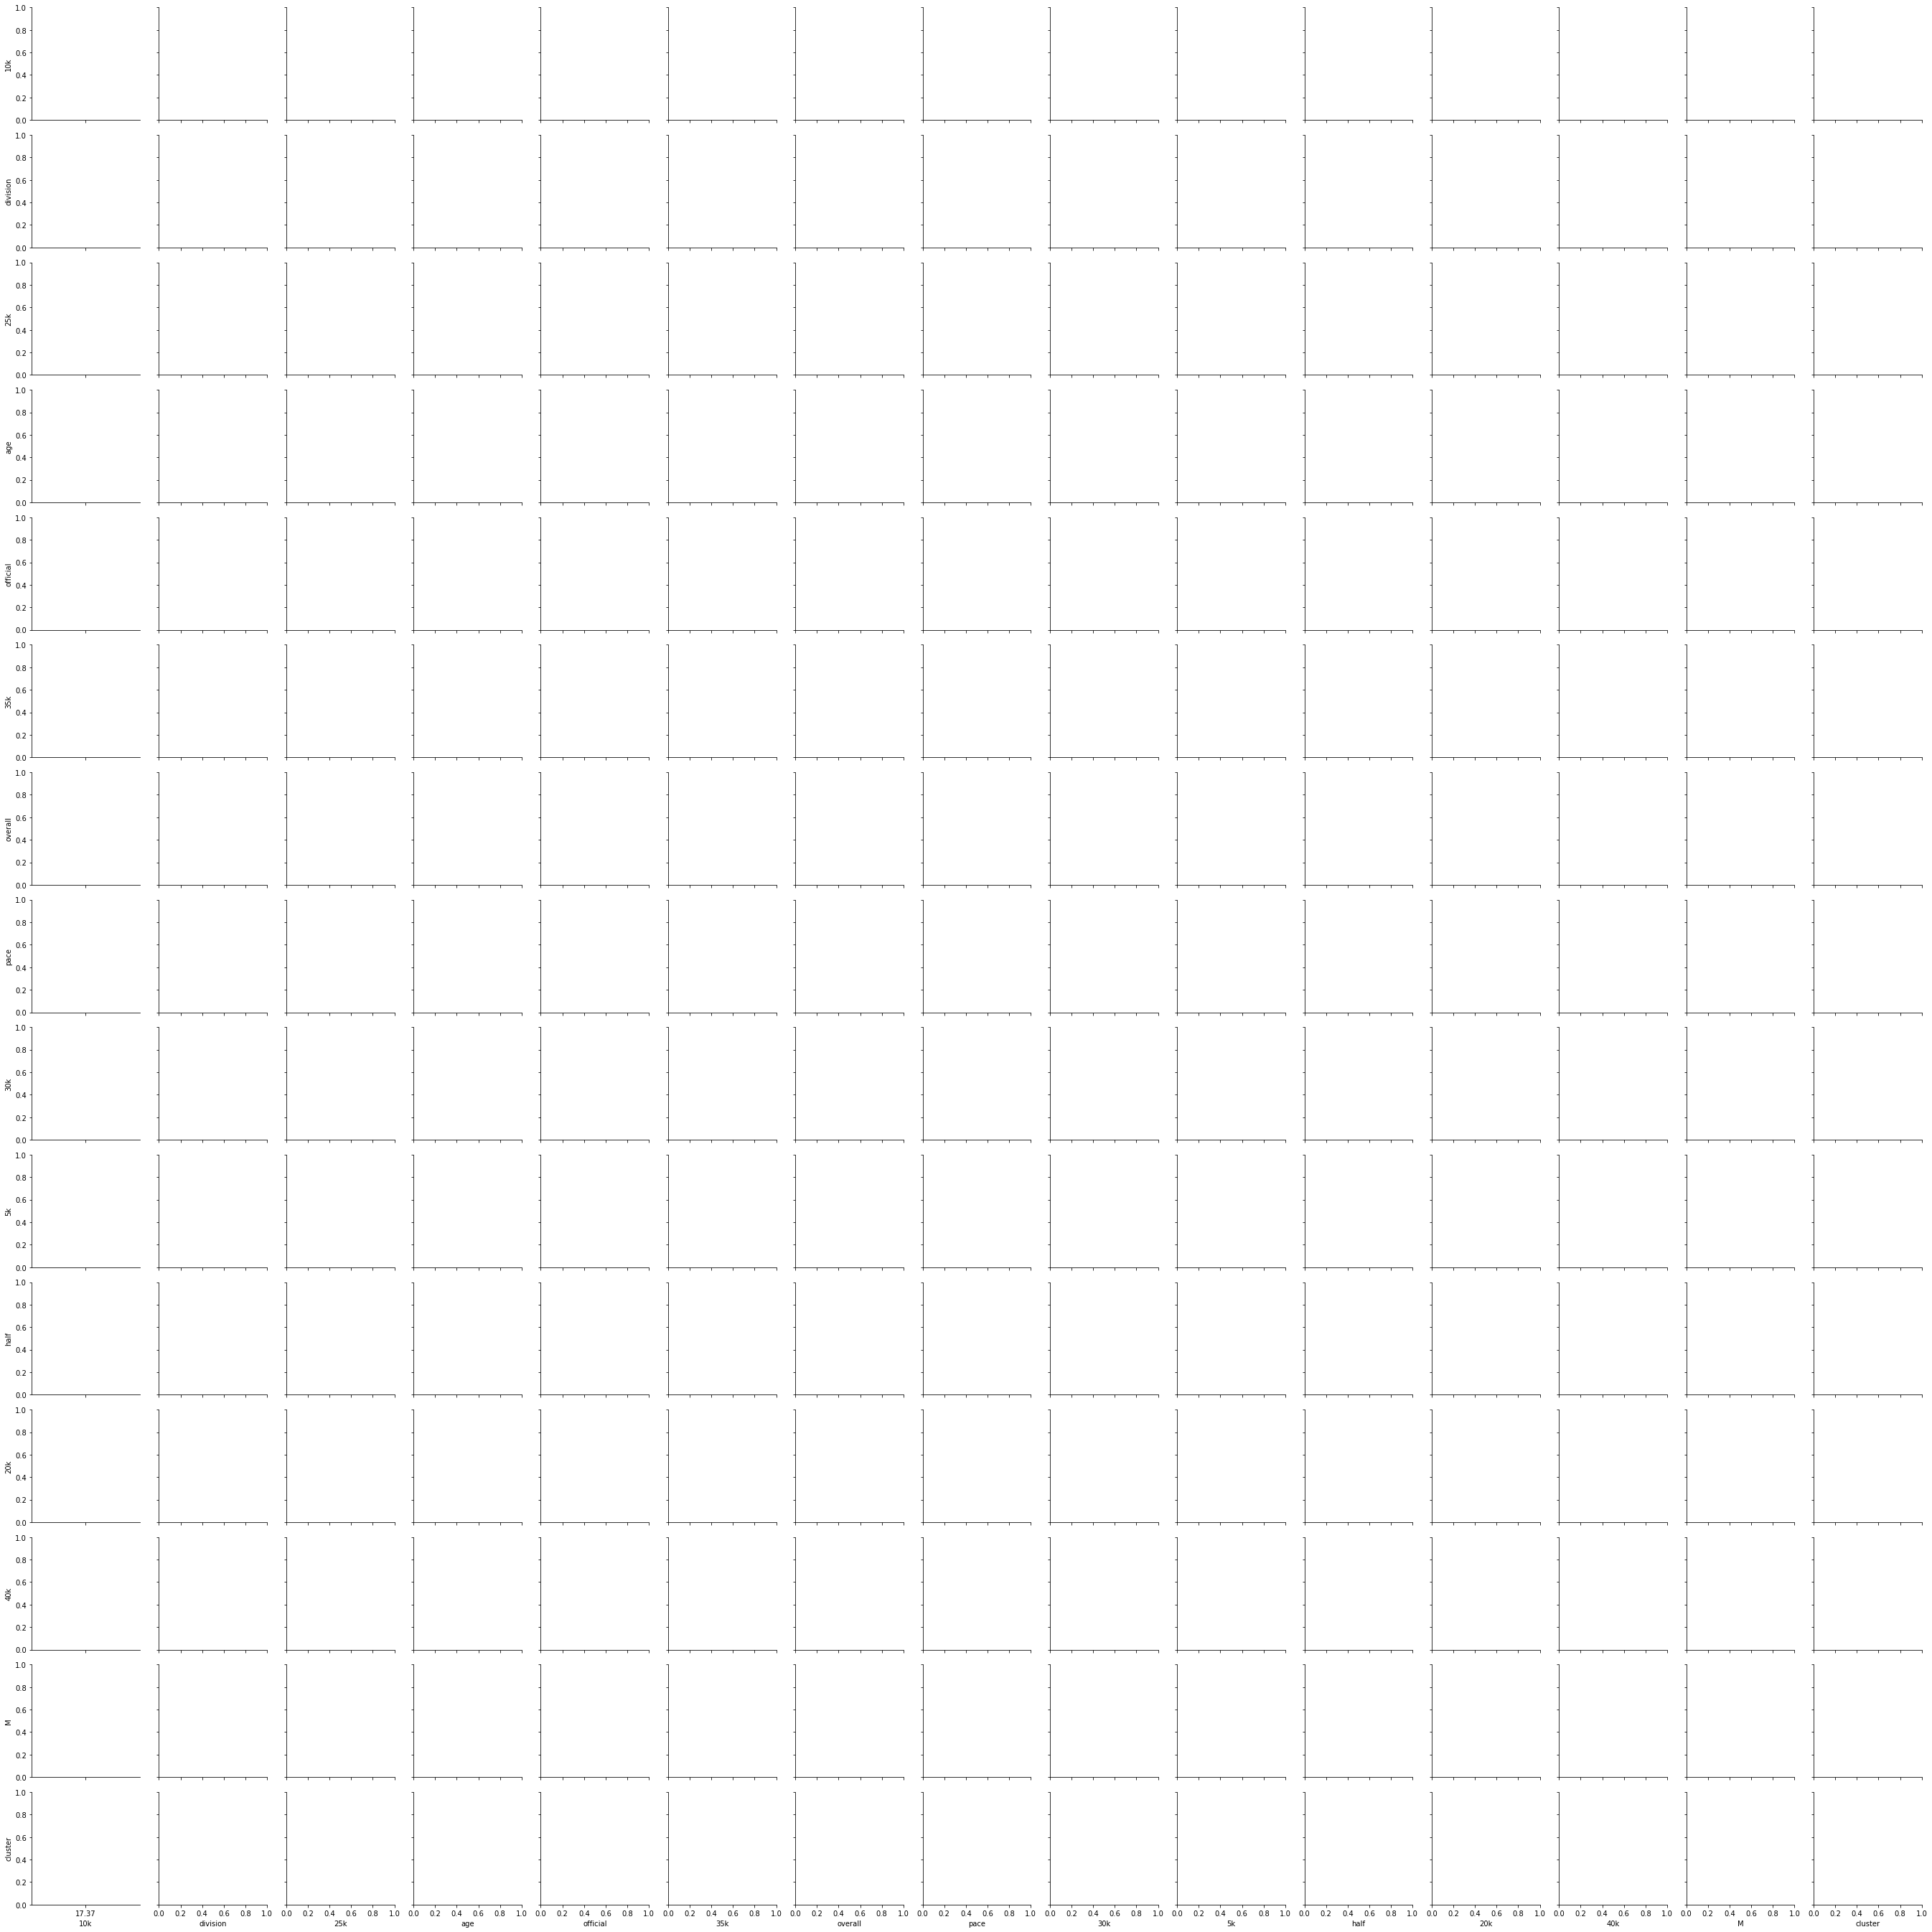

In [23]:
sns.pairplot(df)

## Mean Shift

In [48]:
df2.head()

,10k,division,25k,age,official,35k,overall,pace,30k,5k,half,20k,40k,M
0,17.37,8,47.67,47,85.25,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43,1
1,32.58,1,82.43,33,138.95,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10,0
2,16.62,1,45.80,41,80.60,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10,1
3,32.57,3,82.43,24,140.58,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95,0
4,17.12,2,46.37,40,81.23,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72,1


In [49]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(df2)

# Declare and fit the model.
ms = MeanShift(bandwidth=2000, bin_seeding=True)
ms.fit(df2)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 6


In [50]:
ms.labels_

array([0, 0, 0, ..., 4, 4, 2], dtype=int64)